In [1]:
%pip install --upgrade scikit-image numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
from scipy import ndimage
from scipy.signal import convolve2d
from tqdm import tqdm
import matplotlib.pyplot as plt
from utils.imgutils import *
from utils.functions import *
from utils.pairs import *

In [3]:
filename = '../project_github/IrisRecognition/CASIA1/1/001_1_1.jpg'
img = cv2.imread(filename, 0)
print(img.shape)

# Params
eyelashes_threshold = 80
radial_resolution = 20
angular_resolution = 240    
minw_length = 18
mult = 1
sigma_f = 0.5

# Three step pipeline - Segmentation, normalization, feature encoding
# Segmentation
ciriris, cirpupil, imwithnoise = segment(img, 80, False)

# Normalization
arr_polar, arr_noise = normalize(imwithnoise, ciriris[1],  ciriris[0], ciriris[2],
                                    cirpupil[1], cirpupil[0], cirpupil[2],
                                    radial_resolution, angular_resolution)

# Feature encoding
template, mask_noise = encode_iris(arr_polar, arr_noise, minw_length, mult, sigma_f)

(280, 320)


In [5]:
# def encode_features(filename, eyelashes_threshold = 80):
#     # Parameters
#     eyelashes_threshold = 80
#     radial_resolution = 20
#     angular_resolution = 240
#     minw_length = 18
#     mult = 1
#     sigma_f = 0.5
#     multiprocess = False
#     #  segmentation
#     im = imread(filename, 0)
#     ciriris, cirpupil, imwithnoise = segment(im, eyelashes_threshold,
#                                     multiprocess)

#     # normalization
#     arr_polar, arr_noise = normalize(imwithnoise, ciriris[1],  ciriris[0], ciriris[2],
#                                          cirpupil[1], cirpupil[0], cirpupil[2],
#                                          radial_resolution, angular_resolution)

#     #  feature encoding
#     template, mask_noise = encode_iris(arr_polar, arr_noise, minw_length, mult,
#     sigma_f)
    

#     return template, mask_noise, filename

def encode_features(filename, eyelashes_threshold = 80):
    # Parameters
    # ...
    multiprocess = False
    
    try:
        #  segmentation
        im = cv2.imread(filename, 0)
        if im is None:
            print(f"Warning: Skipping file '{filename}' as it could not be read.")
            return None, None, filename

        ciriris, cirpupil, imwithnoise = segment(im, eyelashes_threshold,
                                         multiprocess)

        # normalization
        arr_polar, arr_noise = normalize(imwithnoise, ciriris[1], ciriris[0], ciriris[2],
                                             cirpupil[1], cirpupil[0], cirpupil[2],
                                             20, 240) # Using hardcoded resolutions
        
        #  feature encoding
        template, mask_noise = encode_iris(arr_polar, arr_noise, 18, 1, 0.5)

        return template, mask_noise, filename
    
    except Exception as e:
        print(f"\nSkipping file '{filename}' due to a fatal error: {e}")
        return None, None, filename

In [6]:
# def extract_and_store(filenames_list, output_dir = 'features'):
#     os.makedirs(output_dir, exist_ok = True)
#     print(f"\nExtracting and storing features in '{output_dir}'...")

#     for img_filename in tqdm(filenames_list, desc="Processing images"):
#         template, mask, original_path = encode_features(img_filename)

#         if template is not None and mask is not None:
#             # Create a unique filename for the template and mask
#             # For example, 'IITD/001/01_L.bmp' becomes 'features/001_01_L.npy'
#             relative_path = os.path.relpath(original_path, start='IITD')
#             base_name = os.path.splitext(relative_path)[0].replace(os.sep, '_')
            
#             template_filename = os.path.join(output_dir, f'{base_name}_template.npy')
#             mask_filename = os.path.join(output_dir, f'{base_name}_mask.npy')

#             # Save the numpy arrays to disk
#             np.save(template_filename, template)
#             np.save(mask_filename, mask)

def extract_and_store(filenames_list, output_dir='features'):
    os.makedirs(output_dir, exist_ok=True)
    print(f"\nExtracting and storing features in '{output_dir}'...")

    for img_filename in tqdm(filenames_list, desc="Processing images"):
        try:
            template, mask, original_path = encode_features(img_filename)

            if template is not None and mask is not None:
                # Create a unique filename for the template and mask
                relative_path = os.path.relpath(original_path, start='IITD')
                base_name = os.path.splitext(relative_path)[0].replace(os.sep, '_')
                
                template_filename = os.path.join(output_dir, f'{base_name}_template.npy')
                mask_filename = os.path.join(output_dir, f'{base_name}_mask.npy')

                # Save the numpy arrays to disk
                np.save(template_filename, template)
                np.save(mask_filename, mask)
        
        except Exception as e:
            # Catch any error and print the filename to identify the issue
            print(f"\nSkipping file '{img_filename}' due to an error: {e}")
            continue

In [7]:
# Run for all the files in the dataset -
def pipeline(extract = False):
    dataset_path = '../datasets/IITD'

    all_filenames = get_filenames(dataset_path)
    print(f"Found {len(all_filenames)} .bmp files")

    structured_data = get_users(all_filenames)
    if structured_data:
        print(f"Successfully organized data for {len(structured_data)} users.")
    else:
        print("Could not find any user data. Please check the 'dataset_path'.")

    
    print(all_filenames[0])
    if (extract):
        extract_and_store(all_filenames)
    print("\nFeature extraction and storage complete.")

    return all_filenames, structured_data
    

In [8]:
all_filenames, structured_data = pipeline(True)

Found 2240 .bmp files
Organizaing users for 2240 files
Successfully organized data for 224 users.
../datasets/IITD/196/09_R.bmp

Extracting and storing features in 'features'...


Processing images:   0%|          | 3/2240 [00:00<01:36, 23.29it/s]

Processing images:  19%|█▉        | 423/2240 [01:42<08:48,  3.44it/s]Traceback (most recent call last):
  File "/mnt/oldhome/nishkal/dd/iris-code/newpipeline/utils/imgutils.py", line 255, in findBottomEyelid
    lines = findline(bottomeyelid_safe)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: Object of type <class 'numpy.ndarray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.
Exception ignored in: 'PyDataMem_UserFREE'
Traceback (most recent call last):
  File "/mnt/oldhome/nishkal/dd/iris-code/newpipeline/utils/imgutils.py", line 255, in findBottomEyelid
    lines = findline(bottomeyelid_safe)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: PyCapsule_GetPointer called with invalid PyCapsule object
Processing

: 

: 

In [ ]:
def load_template_and_mask(image_path, features_dir='features'):
    """
    Loads a template and mask based on the original image path,
    now correctly handling your specific file naming convention.
    """
    try:
        # Step 1: Get the full path to the image, relative to the current working directory
        full_image_path_norm = os.path.normpath(image_path)
        
        # Step 2: Get the filename part and the path part without the extension
        path_without_ext, _ = os.path.splitext(full_image_path_norm)
        
        # Step 3: Recreate the base name string by replacing path separators
        # This matches the pattern '.._.._datasets_IITD_...'
        base_name = path_without_ext.replace(os.sep, '_').replace('..', '.._..')
        
        # Step 4: Construct the full path to the feature files
        template_filename = os.path.join(features_dir, f'{base_name}_template.npy')
        mask_filename = os.path.join(features_dir, f'{base_name}_mask.npy')
        
        # Print the path for debugging to ensure it's correct
        #print(f"Loading files from: {template_filename}")
        
        template = np.load(template_filename)
        mask = np.load(mask_filename)
        return template, mask
    except FileNotFoundError:
        print(f"Error: Template or mask not found for {image_path}.")
        print(f"Looked for: '{template_filename}'")
        return None, None
    except Exception as e:
        print(f"An error occurred loading features for {image_path}: {e}")
        return None, None

def compare_pairs(pairs_list, features_dir='features', is_genuine=True):
    """
    Calculates and returns the list of Hamming distances for a given list of pairs.
    """
    distances = []
    pair_type = "Genuine" if is_genuine else "Impostor"
    
    print(f"\nCalculating Hamming distances for {len(pairs_list)} {pair_type.lower()} pairs...")
    
    for pair in tqdm(pairs_list, desc=f"Comparing {pair_type} pairs"):
        img_path1, img_path2 = pair
        
        template1, mask1 = load_template_and_mask(img_path1, features_dir)
        template2, mask2 = load_template_and_mask(img_path2, features_dir)

        if template1 is not None and template2 is not None:
            distance = HammingDistance(template1, mask1, template2, mask2)
            if not np.isnan(distance):
                distances.append(distance)
    
    return distances

def compare_pairs2(pairs_list, features_dir='features', is_genuine=True):
    results = []
    pair_type = "Genuine" if is_genuine else "Impostor"
    
    print(f"\nCalculating Hamming distances for {len(pairs_list)} {pair_type.lower()} pairs...")
    
    for pair in tqdm(pairs_list, desc=f"Comparing {pair_type} pairs"):
        img_path1, img_path2 = pair
        
        template1, mask1 = load_template_and_mask(img_path1, features_dir)
        template2, mask2 = load_template_and_mask(img_path2, features_dir)

        if template1 is not None and template2 is not None:
            distance = HammingDistance(template1, mask1, template2, mask2)
            if not np.isnan(distance):
                # Append a tuple of the distance and the pair to the results list
                results.append((distance, pair))
    
    return results

def plot_distributions(genuine_distances, impostor_distances):
    """
    Creates and displays a histogram of the genuine and impostor Hamming distances.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(genuine_distances, bins=50, alpha=0.5, label='Genuine Pairs')
    plt.hist(impostor_distances, bins=50, alpha=0.5, label='Impostor Pairs')
    
    plt.title('Distribution of Hamming Distances')
    plt.xlabel('Hamming Distance')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def test(all_filenames, structured_data, features_path='./features'):
    # Generate genuine pairs
    genuine_pairs = generate_genuine_pairs(structured_data)
    print(f"\n--- Pair Generation Summary ---")
    print(f"Found {len(genuine_pairs)} genuine pairs.")

    num_impostor_pairs_to_generate = len(genuine_pairs)
    impostor_pairs = generate_impostor_pairs(structured_data, num_impostor_pairs_to_generate)
    print(f"Generated {len(impostor_pairs)} impostor pairs.")

    print("\n--- Example Pairs ---")
    if genuine_pairs:
        print("Genuine Pair Example:")
        print(f"  {genuine_pairs[0]}")
    if impostor_pairs:
        print("Impostor Pair Example:")
        print(f"  {impostor_pairs[0]}")

    # Now, compare_pairs returns a list of tuples (distance, pair)
    genuine_results = compare_pairs2(genuine_pairs, features_path, is_genuine=True)
    impostor_results = compare_pairs2(impostor_pairs, features_path, is_genuine=False)

    # Unpack the distances from the results lists for plotting and analysis
    genuine_distances = [d for d, p in genuine_results]
    impostor_distances = [d for d, p in impostor_results]

    # Step 3: Plot the distributions
    if genuine_distances and impostor_distances:
        plot_distributions(genuine_distances, impostor_distances)
    else:
        print("\nCould not generate the plot. Please check if the 'features' directory exists and contains data.")

    # Return the required lists
    return genuine_results, impostor_results, impostor_pairs, genuine_pairs

Generated - 4808 genuine pairs

--- Pair Generation Summary ---
Found 4808 genuine pairs.
Generating 4808 impostor pairs...
Generated 4808 impostor pairs.

--- Example Pairs ---
Genuine Pair Example:
  ('../datasets/IITD/196/09_R.bmp', '../datasets/IITD/196/10_R.bmp')
Impostor Pair Example:
  ('../datasets/IITD/103/01_L.bmp', '../datasets/IITD/122/07_R.bmp')

Calculating Hamming distances for 4808 genuine pairs...


Comparing Genuine pairs: 100%|██████████| 4808/4808 [00:06<00:00, 761.33it/s]



Calculating Hamming distances for 4808 impostor pairs...


Comparing Impostor pairs: 100%|██████████| 4808/4808 [00:06<00:00, 756.40it/s]


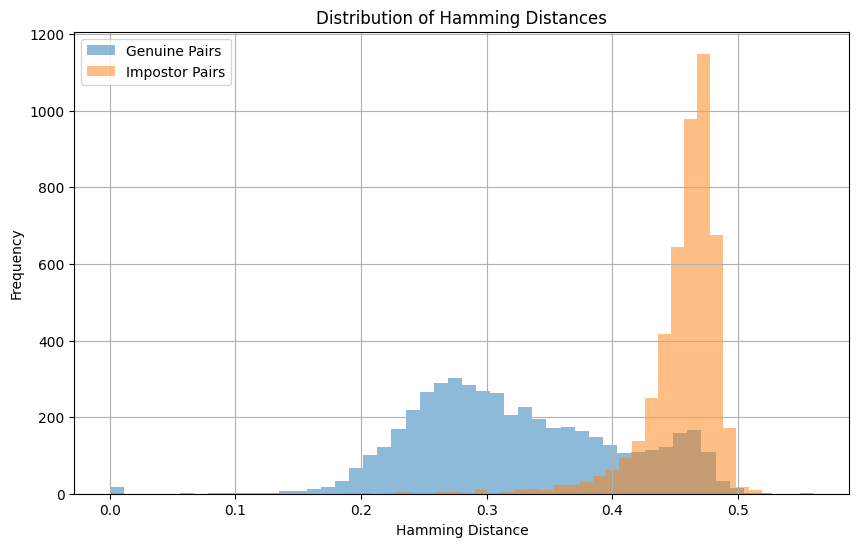

In [ ]:
genuine_results, impostor_results, impostor_pairs, genuine_pairs = test(all_filenames, structured_data)
genuine_distances = [d for d, p in genuine_results]
impostor_distances = [d for d, p in impostor_results]


In [ ]:

def calculate_eer_far_frr_curves(genuine_distances, impostor_distances):
    """
    Calculates the EER, FAR, and FRR for a given set of genuine and impostor distances.
    
    Args:
        genuine_distances (list): List of Hamming distances for genuine pairs.
        impostor_distances (list): List of Hamming distances for impostor pairs.
        
    Returns:
        tuple: A tuple containing lists of (thresholds, FARs, FRRs) and the EER value.
    """
    if not genuine_distances or not impostor_distances:
        print("Error: Genuine or impostor distance lists are empty.")
        return None, None, None, None

    # Sort the distances for easier calculation
    genuine_distances = sorted(genuine_distances)
    impostor_distances = sorted(impostor_distances)
    
    # Generate a range of thresholds to test
    thresholds = np.linspace(0.0, 1.0, 1000)
    
    far_curve = []
    frr_curve = []
    
    total_genuine = len(genuine_distances)
    total_impostor = len(impostor_distances)
    
    # Iterate through each threshold to calculate FAR and FRR
    for T in thresholds:
        # Calculate FAR: number of impostors with distance <= T
        false_accepts = np.sum(np.array(impostor_distances) <= T)
        far = false_accepts / total_impostor
        far_curve.append(far)
        
        # Calculate FRR: number of genuine with distance > T
        false_rejects = np.sum(np.array(genuine_distances) > T)
        frr = false_rejects / total_genuine
        frr_curve.append(frr)
        
    # Find the EER
    # The EER is where FAR is closest to FRR
    eer_index = np.argmin(np.abs(np.array(far_curve) - np.array(frr_curve)))
    eer = (far_curve[eer_index] + frr_curve[eer_index]) / 2
    
    return thresholds, far_curve, frr_curve, eer

def plot_eer_curves(thresholds, far_curve, frr_curve, eer):
    """
    Plots the FAR and FRR curves and highlights the EER.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, far_curve, label='False Acceptance Rate (FAR)')
    plt.plot(thresholds, frr_curve, label='False Rejection Rate (FRR)')
    plt.plot(thresholds, np.ones(len(thresholds)) * eer, '--', color='red', label=f'EER = {eer:.4f}')
    
    plt.title('FAR and FRR Curves')
    plt.xlabel('Hamming Distance Threshold')
    plt.ylabel('Error Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

The Equal Error Rate (EER) is: 0.1379


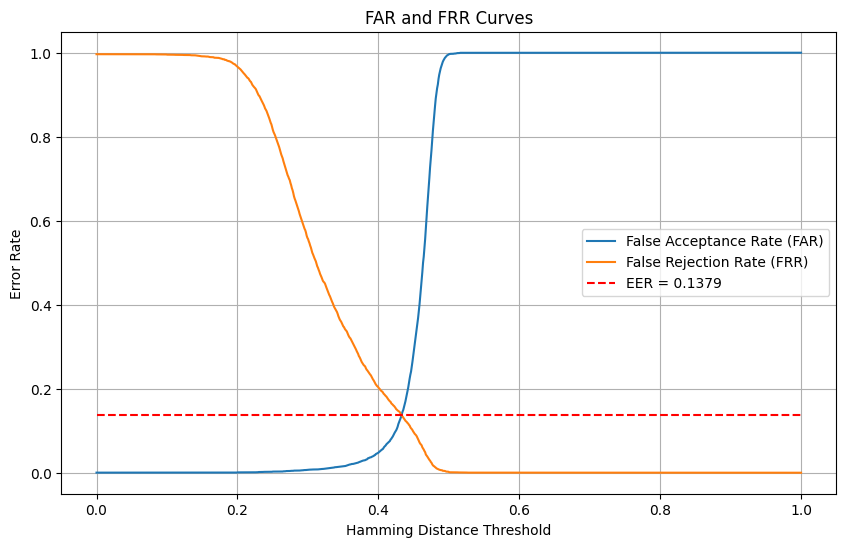

The threshold at which the EER occurs is: 0.4334


In [ ]:

# Step 1: Calculate the curves and EER
thresholds, far_curve, frr_curve, eer = calculate_eer_far_frr_curves(genuine_distances, impostor_distances)

# Step 2: Print the EER value
if eer is not None:
    print(f"The Equal Error Rate (EER) is: {eer:.4f}")

# Step 3: Plot the curves
if all(x is not None for x in [thresholds, far_curve, frr_curve, eer]):
    plot_eer_curves(thresholds, far_curve, frr_curve, eer)

eer_index = np.argmin(np.abs(np.array(far_curve) - np.array(frr_curve)))

# Retrieve the threshold at that index
eer_threshold = thresholds[eer_index]

print(f"The threshold at which the EER occurs is: {eer_threshold:.4f}")

In [ ]:
import numpy as np

def calculate_average_distances(genuine_distances, impostor_distances):
    """
    Calculates and prints the average Hamming distances for both
    genuine and impostor pairs.

    Args:
        genuine_distances (list): List of Hamming distances for genuine pairs.
        impostor_distances (list): List of Hamming distances for impostor pairs.
    """
    if genuine_distances:
        avg_genuine_hd = np.mean(genuine_distances)
        print(f"Average Genuine Hamming Distance: {avg_genuine_hd:.4f}")
    else:
        print("No genuine distances to calculate the average.")
        
    if impostor_distances:
        avg_impostor_hd = np.mean(impostor_distances)
        print(f"Average Impostor Hamming Distance: {avg_impostor_hd:.4f}")
    else:
        print("No impostor distances to calculate the average.")

calculate_average_distances(genuine_distances, impostor_distances)

Average Genuine Hamming Distance: 0.3238
Average Impostor Hamming Distance: 0.4561


In [ ]:
def find_low_hd_pairs(results, threshold=0.1, pair_type="Impostor"):

    if not results:
        print(f"No {pair_type.lower()} data available to check.")
        return

    low_hd_pairs = []
    
    for distance, pair in results:
        if distance <= threshold:
            low_hd_pairs.append((distance, pair))
            
    if low_hd_pairs:
        print(f"\n--- Found {len(low_hd_pairs)} {pair_type.lower()} pairs with HD <= {threshold} ---")
        for distance, pair in low_hd_pairs:
            print(f"Distance: {distance:.4f}, Pair: {pair}")
    else:
        print(f"\nNo {pair_type.lower()} pairs found with HD <= {threshold}.")

In [ ]:
# Find impostor pairs with a suspiciously low Hamming distance
find_low_hd_pairs(impostor_results, threshold=0.1, pair_type="Impostor")

# You can also check for genuine pairs that might have a very low HD
find_low_hd_pairs(genuine_results, threshold=0.01, pair_type="Genuine")


--- Found 1 impostor pairs with HD <= 0.1 ---
Distance: 0.0000, Pair: ('../datasets/IITD/118/08_R.bmp', '../datasets/IITD/150/08_R.bmp')

--- Found 17 genuine pairs with HD <= 0.01 ---
Distance: 0.0000, Pair: ('../datasets/IITD/113/09_R.bmp', '../datasets/IITD/113/08_R.bmp')
Distance: 0.0000, Pair: ('../datasets/IITD/113/10_R.bmp', '../datasets/IITD/113/08_R.bmp')
Distance: 0.0000, Pair: ('../datasets/IITD/113/01_L.bmp', '../datasets/IITD/113/04_L.bmp')
Distance: 0.0000, Pair: ('../datasets/IITD/032/08_R.bmp', '../datasets/IITD/032/07_R.bmp')
Distance: 0.0000, Pair: ('../datasets/IITD/148/09_R.bmp', '../datasets/IITD/148/10_R.bmp')
Distance: 0.0000, Pair: ('../datasets/IITD/065/06_L.bmp', '../datasets/IITD/065/05_L.bmp')
Distance: 0.0000, Pair: ('../datasets/IITD/184/09_R.bmp', '../datasets/IITD/184/06_R.bmp')
Distance: 0.0000, Pair: ('../datasets/IITD/160/09_R.bmp', '../datasets/IITD/160/08_R.bmp')
Distance: 0.0000, Pair: ('../datasets/IITD/205/09_R.bmp', '../datasets/IITD/205/10_R.b

In [ ]:
def load_template_and_mask(image_path, features_dir='features'):
    try:
        full_image_path_norm = os.path.normpath(image_path)
        path_without_ext, _ = os.path.splitext(full_image_path_norm)
        base_name = path_without_ext.replace(os.sep, '_').replace('..', '.._..')
        
        template_filename = os.path.join(features_dir, f'{base_name}_template.npy')
        mask_filename = os.path.join(features_dir, f'{base_name}_mask.npy')
        
        template = np.load(template_filename)
        mask = np.load(mask_filename)
        return template, mask
    except FileNotFoundError:
        print(f"Error: Template or mask not found for {image_path}.")
        print(f"Looked for: '{template_filename}'")
        return None, None
    except Exception as e:
        print(f"An error occurred loading features for {image_path}: {e}")
        return None, None


# The impostor pair you are investigating
impostor_pair = ('../datasets/IITD/118/08_R.bmp', '../datasets/IITD/150/08_R.bmp')

# The directory where your features are stored
features_path = './features'

# --- Load the templates and masks for the pair ---
path1, path2 = impostor_pair

print("--- Loading features for Pair 1 ---")
template1, mask1 = load_template_and_mask(path1, features_path)

print("\n--- Loading features for Pair 2 ---")
template2, mask2 = load_template_and_mask(path2, features_path)


# --- Inspect the loaded data ---
if template1 is not None and template2 is not None:
    print("\n--- Inspection of Loaded Data ---")

    print(f"Template 1 shape: {template1.shape}")
    print(f"Template 1 (first 5x5): \n{template1[:5, :5]}")
    print(f"Template 1 (unique values): {np.unique(template1)}")
    
    print(f"\nMask 1 shape: {mask1.shape}")
    print(f"Mask 1 (first 5x5): \n{mask1[:5, :5]}")
    print(f"Mask 1 (unique values): {np.unique(mask1)}")

    print(f"\nTemplate 2 shape: {template2.shape}")
    print(f"Template 2 (first 5x5): \n{template2[:5, :5]}")
    print(f"Template 2 (unique values): {np.unique(template2)}")
    
    print(f"\nMask 2 shape: {mask2.shape}")
    print(f"Mask 2 (first 5x5): \n{mask2[:5, :5]}")
    print(f"Mask 2 (unique values): {np.unique(mask2)}")

    # --- Manual Hamming Distance Calculation for Verification ---
    print("\n--- Manual Hamming Distance Verification (without shifts) ---")

    # Combine the masks
    combined_mask = np.logical_or(mask1, mask2)
    
    # Calculate XOR of templates
    xor_result = np.logical_xor(template1, template2)
    
    # Apply combined mask to XOR result
    diff_bits = np.logical_and(xor_result, np.logical_not(combined_mask))
    
    # Count differing bits and total bits to compare
    bits_diff = np.sum(diff_bits)
    total_bits = template1.size - np.sum(combined_mask)
    
    # Calculate HD
    if total_bits > 0:
        hd = bits_diff / total_bits
    else:
        hd = np.nan

    print(f"Total bits to compare (not masked): {total_bits}")
    print(f"Number of bits that differ: {bits_diff}")
    print(f"Hamming Distance (no shifts): {hd:.4f}")
    
    if hd == 0.0:
        print("\n**Warning: Hamming Distance is 0.0. Possible issues:**")
        if total_bits == 0:
            print("  - Both masks are completely covering the templates, leaving no bits to compare.")
        elif np.array_equal(template1, template2):
            print("  - The templates are identical, which should not happen for an impostor pair.")
        else:
            print("  - The templates differ only in masked regions.")

if template1 is not None and template2 is not None:
    print("\n--- Manual Hamming Distance Verification (WITH SHIFTS) ---")
    
    min_hd = np.nan
    best_shift = None

    for shifts in range(-8, 9):
        template1s = shiftbits_ham(template1, shifts)
        mask1s = shiftbits_ham(mask1, shifts)
        
        combined_mask = np.logical_or(mask1s, mask2)
        
        xor_result = np.logical_xor(template1s, template2)
        diff_bits = np.logical_and(xor_result, np.logical_not(combined_mask))
        
        bits_diff = np.sum(diff_bits)
        total_bits = template1s.size - np.sum(combined_mask)
        
        if total_bits > 0:
            hd1 = bits_diff / total_bits
            if hd1 < min_hd or np.isnan(min_hd):
                min_hd = hd1
                best_shift = shifts
    
    print(f"Minimum Hamming Distance found: {min_hd:.4f}")
    print(f"Occurred at a shift of: {best_shift}")

--- Loading features for Pair 1 ---

--- Loading features for Pair 2 ---

--- Inspection of Loaded Data ---
Template 1 shape: (20, 480)
Template 1 (first 5x5): 
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [1. 1. 0. 1. 0.]]
Template 1 (unique values): [0. 1.]

Mask 1 shape: (20, 480)
Mask 1 (first 5x5): 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Mask 1 (unique values): [0. 1.]

Template 2 shape: (20, 480)
Template 2 (first 5x5): 
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1.]]
Template 2 (unique values): [0. 1.]

Mask 2 shape: (20, 480)
Mask 2 (first 5x5): 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Mask 2 (unique values): [0. 1.]

--- Manual Hamming Distance Verification (without shifts) ---
Total bits to compare (not masked): 10
Number of bits that differ: 4
Hamming Distance (no shifts): 0.4000

--- Manual Hamming Dist